In [1]:
import random
import numpy as np
import torch

from neuralee.embedding import NeuralEE
from neuralee.dataset import BrainLargeDataset 
from neuralee._aux import scatter_without_outlier

%matplotlib inline

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

torch.manual_seed(1234)
random.seed(1234)
np.random.seed(1234)

In [2]:
brain_dataset = BrainLargeDataset(save_path='data/')
brain_dataset.log_shift()
brain_dataset.standardscale()
#At least 48G ram needed!
brain_dataset.affinity_split(N_small=5000, verbose=True) 

File ../data/genomics.h5 already downloaded
Preprocessing Brain Large data
loaded 100000 / 1306127 cells
loaded 200000 / 1306127 cells
loaded 300000 / 1306127 cells
loaded 400000 / 1306127 cells
loaded 500000 / 1306127 cells
loaded 600000 / 1306127 cells
loaded 700000 / 1306127 cells
loaded 800000 / 1306127 cells
loaded 900000 / 1306127 cells
loaded 1000000 / 1306127 cells
loaded 1100000 / 1306127 cells
loaded 1200000 / 1306127 cells
loaded 1300000 / 1306127 cells
loaded 1306127 / 1306127 cells
excluding 1020 cells with zero genes expressed
1305107 cells subsampled
720 genes subsampled
Compute affinity, perplexity=20.0, N_small=5000, on each batch
affinity on each batch: 100%|██████████| 261/261 [23:21<00:00,  5.57s/it]


NeuralEE: 100%|██████████| 50/50 [09:04<00:00, 10.88s/it]
Neural Elastic Embedding, lambda=10, completed in 552.66s.


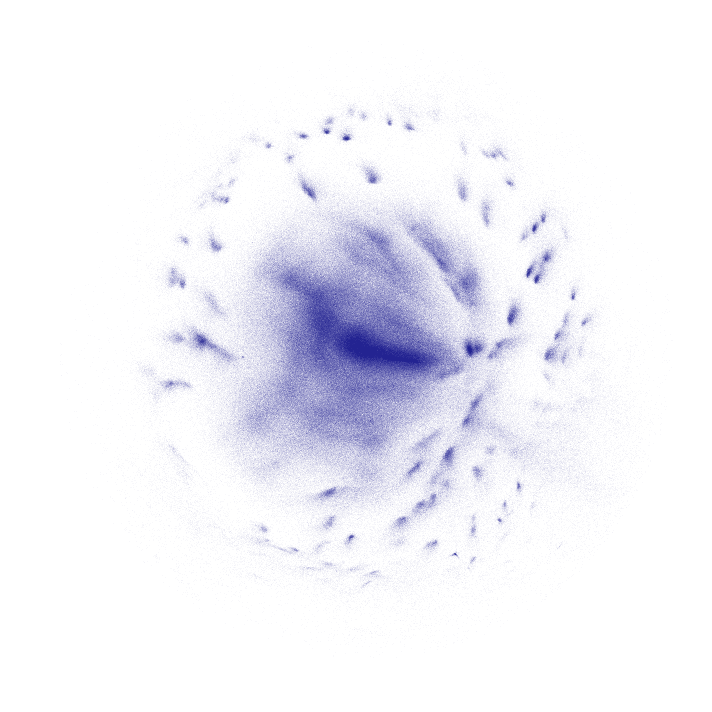

In [3]:
NEE = NeuralEE(brain_dataset, device=device)
#Only pin_memory = False, not enough ram of GPU.
#Now, time mainly cost on data tranfering to GPU on each iteration.
#If ram of GPU is enough, speed could 4 times faster.
results = NEE.fine_tune(
    maxit=50, verbose=True, calculate_error=None, pin_memory=False)
scatter_without_outlier(results['X'].numpy())